<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
np.random.seed(10)

MU = 64
SIGMA = 5

sample_size = 10
heights = np.random.normal(MU, SIGMA, sample_size)
print(f'Samples: {heights}')

mean_heights = np.mean(heights)
print(f'Sample mean: {mean_heights}')

Samples: [70.65793252 67.57639487 56.27299854 63.95808075 67.10667987 60.3995722
 65.32755793 64.54274263 64.02145715 63.12699895]
Sample mean: 64.29904154070394


In [3]:
print(f'Sample standard deviation: {np.std(heights)}')

Sample standard deviation: 3.759878018454642


In [4]:
standard_error = np.std(heights) / np.sqrt(heights.shape[0])
print(f'Standard Error: {standard_error}')

Standard Error: 1.1889778262717268


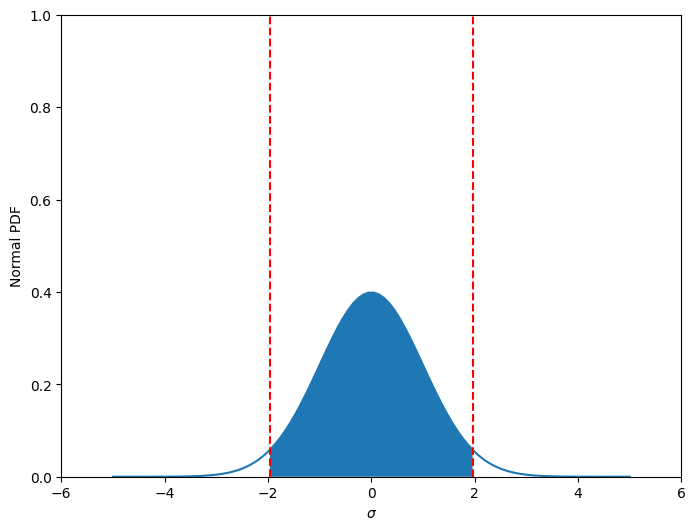

In [11]:
x = np.linspace(-5, 5, 100)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.vlines(-1.96, 0, 1, colors='r', linestyle='dashed')
plt.vlines(1.96, 0, 1, colors='r', linestyle='dashed')

fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y)
plt.xlim([-6, 6])
plt.ylim([0, 1])
plt.xlabel('$\sigma$')
plt.ylabel('Normal PDF')
plt.show()

In [12]:
## Determine if the sample mean lies in the confidence interval
lower = np.mean(heights) - 1.96
upper = np.mean(heights) + 1.96
print(f'Lower limit: {lower}, Upper limit: {upper}')

Lower limit: 62.33904154070394, Upper limit: 66.25904154070393


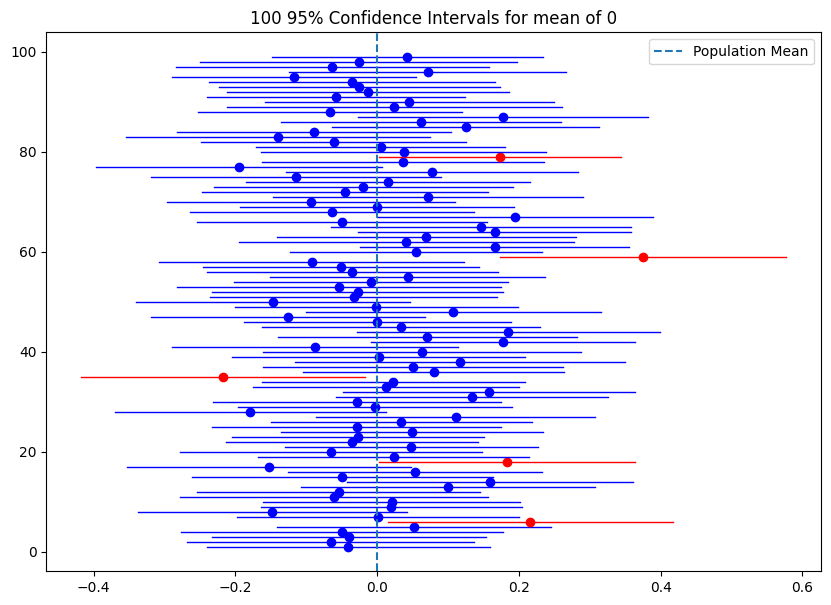

In [14]:
np.random.seed(8309)
n = 100
samples = [np.random.normal(loc=0, scale=1, size=100) for _ in range(n)]

fig, ax = plt.subplots(figsize=(10, 7))
for i in np.arange(1, n, 1):
    sample_mean = np.mean(samples[i])
    se = stats.sem(samples[i])
    h = se * stats.t.ppf((1 + 0.95) / 2, len(samples[i]) - 1)
    sample_ci = [sample_mean - h, sample_mean + h]
    if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='blue', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'bo');
    else:
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='red', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'ro');
plt.axvline(x=0, ymin=0, ymax=1, linestyle='--', label = 'Population Mean');
plt.legend(loc='best');
plt.title('100 95% Confidence Intervals for mean of 0')
plt.show()

In [17]:
t_val = stats.t.ppf((1 + 0.95) / 2, heights.shape[0] - 1)
print(f'Sample mean height: {mean_heights}')
print(f'T-Val: {t_val}')
print(f'Standard Error: {standard_error}')
print(f'Confidence interval: {mean_heights - t_val * standard_error}, {mean_heights + t_val * standard_error}')

Sample mean height: 64.29904154070394
T-Val: 2.2621571627409915
Standard Error: 1.1889778262717268
Confidence interval: 61.60938683466314, 66.98869624674474


In [18]:
print(f'99% confidence interval: {stats.t.interval(0.99, df=9, loc=mean_heights, scale=standard_error)}')
print(f'95% confidence interval: {stats.t.interval(0.95, df=9, loc=mean_heights, scale=standard_error)}')
print(f'90% confidence interval: {stats.t.interval(0.90, df=9, loc=mean_heights, scale=standard_error)}')

99% confidence interval: (60.43505913983995, 68.16302394156793)
95% confidence interval: (61.60938683466314, 66.98869624674474)
90% confidence interval: (62.11951091072683, 66.47857217068105)


In [19]:
print(f'{stats.norm.interval(0.99, loc=mean_heights, scale=standard_error)}')
print(f'{stats.norm.interval(0.95, loc=mean_heights, scale=standard_error)}')
print(f'{stats.norm.interval(0.90, loc=mean_heights, scale=standard_error)}')

(61.23643761452335, 67.36164546688453)
(61.968687822794635, 66.62939525861324)
(62.34334705079601, 66.25473603061187)


In [21]:
# Changing the sample sizes
np.random.seed(10)
sample_size = [10, 100, 1000]
for s in sample_size:
    heights = np.random.normal(MU, SIGMA, s)
    SE = np.std(heights) / np.sqrt(s)
    print(stats.norm.interval(0.95, loc=np.mean(heights), scale=SE))

(61.968687822794635, 66.62939525861324)
(63.29603675544214, 65.20673577695686)
(63.61859127487577, 64.2048075601379)


## Visualizing Confidence Intervals

Lower: 62.886848304253455, Upper: 64.90497312563694


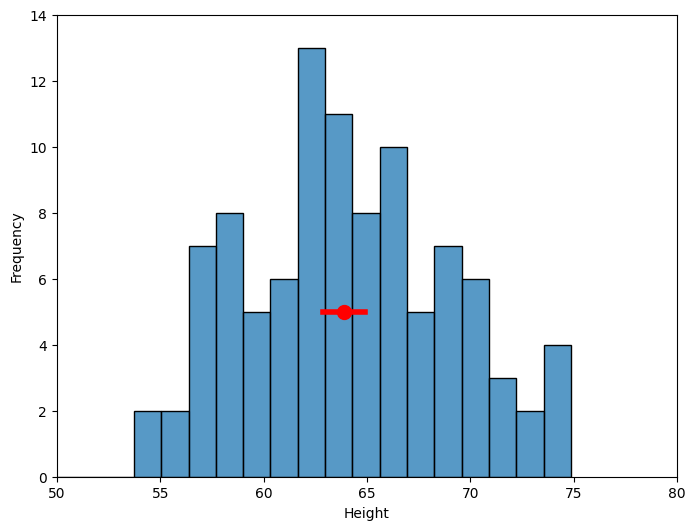

In [27]:
sample_size = 100
heights = np.random.normal(MU, SIGMA, sample_size)
SE = np.std(heights) / np.sqrt(sample_size)
(l, u) = stats.norm.interval(0.95, loc=np.mean(heights), scale=SE)

print(f'Lower: {l}, Upper: {u}')

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(heights, bins=20, ax=ax)
ax.set_ylim([0, 14])
ax.set_xlim([50, 80])
ax.set_xlabel('Height')
ax.set_ylabel('Frequency')

y_height = 5
ax.plot([l, u], [y_height, y_height], '-', color='r', linewidth=4, label='Confidence Interval')
ax.plot(np.mean(heights), y_height, 'o', color='r', markersize=10)
plt.show()

## Miscalibration and Violation of Assumptions

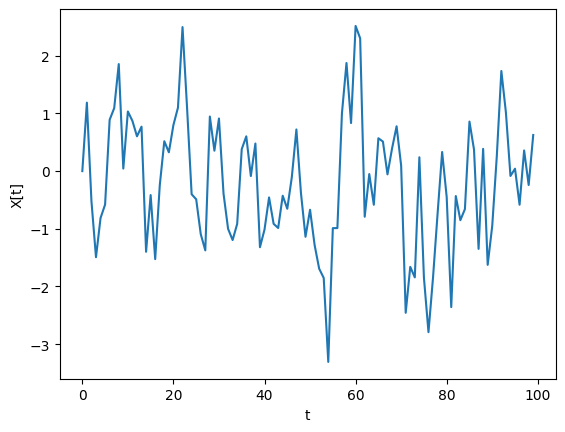

In [28]:
def generated_autocorrelated_data(theta, mu, sigma, N):
    X = np.zeros((N, 1))

    for t in range(1, N):
        X[t] = theta * X[t - 1] + np.random.normal(mu, sigma)

    return X

X = generated_autocorrelated_data(0.5, 0, 1, 100)
plt.plot(X)
plt.xlabel('t')
plt.ylabel('X[t]')
plt.show()

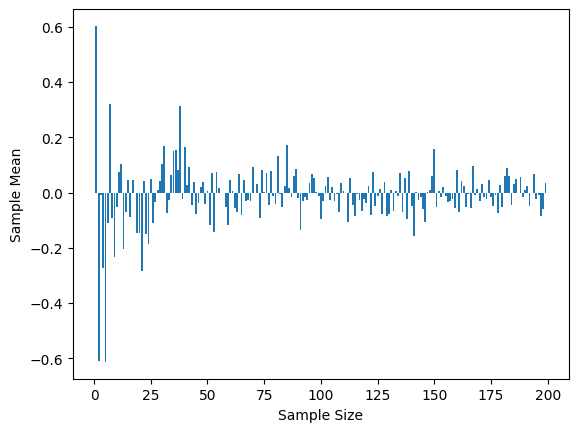

In [29]:
sample_means = np.zeros(200 - 1)
for i in range(1, 200):
    X = generated_autocorrelated_data(0.5, 0, 1, i * 10)
    sample_means[i - 1] = np.mean(X)

plt.bar(range(1, 200), sample_means)
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.show()

In [30]:
np.mean(sample_means)

-0.009543855241044463

In [31]:
def compute_unadjusted_interval(X):
    T = len(X)
    mu, sigma = np.mean(X), np.std(X)
    SE = sigma / np.sqrt(T)
    return stats.norm.interval(0.95, loc=mu, scale=SE)

def check_unadjusted_converge(X):
    l, u = compute_unadjusted_interval(X)
    if (l <= 0) and (u >=0):
        return True
    else:
        return False

In [33]:
T = 100
trials = 500
n_correct = 0
for i in range(trials):
    X = generated_autocorrelated_data(0.5, 0, 1, T)
    if check_unadjusted_converge(X):
        n_correct += 1

print(f'Empirical Convergence: {n_correct / trials:0.4f}')
print(f'Expected: {0.95}')

Empirical Convergence: 0.6920
Expected: 0.95


## Questions

In [34]:
np.random.seed(11)
POPULATION_MU = 105
POPULATION_SIGMA = 20
sample_size = 50

In [35]:
# Exercise 1: Determine Confidence Intervals

sample = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
print(f'Sample Mean: {np.mean(sample)}')

Sample Mean: 103.22364700456181


In [36]:
print(f'Sample Standard Deviation: {np.std(sample)}')
print(f'Sample Standard Error: {np.std(sample) / np.sqrt(sample_size)}')

Sample Standard Deviation: 18.064573023858248
Sample Standard Error: 2.5547164168819485


In [38]:
# confidence intervals
lower, upper = stats.norm.interval(0.95, loc=np.mean(sample), scale=np.std(sample) / np.sqrt(sample_size))
print(f'Lower limit: {lower}, Upper limit: {upper}')

Lower limit: 98.21649483675998, Upper limit: 108.23079917236365


In [41]:
# Exercise 2: Interpreting Confidence Intervals

n = 1000
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=sample_size) for i in range(n)]

for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = np.std(samples[i]) / np.sqrt(sample_size)
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1
print(f'Expected Results: {0.95 * 1000}')
print(f'Simulation Convergence: {correct / n * 1000:0.4f}')

Expected Results: 950.0
Simulation Convergence: 947.0000


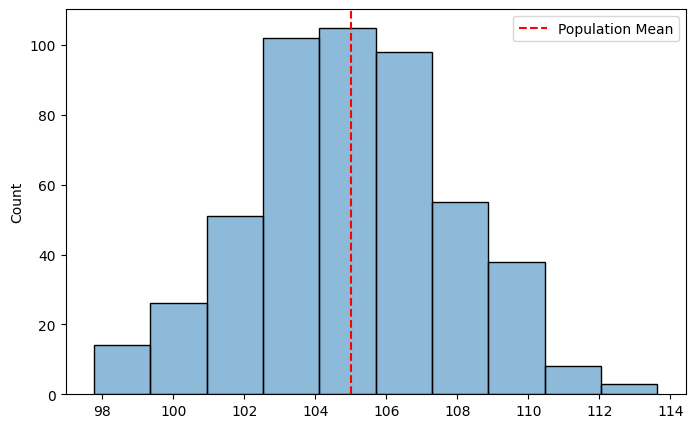

In [54]:
# Exercise 3: Central Limit Theorem

n = 500
normal_samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=sample_size) for i in range(n)]

vals = np.zeros((n, 1))
for i in range(n):
    sample_mean = np.mean(normal_samples[i])
    vals[i] = sample_mean

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(vals, bins=10, ax=ax)
ax.axvline(POPULATION_MU, linestyle='--', color='r', label='Population Mean')
ax.legend()
plt.show()

In [57]:
outputs = stats.jarque_bera(normal_samples)
if outputs[-1] > 0.05:
    print(f'Pvalue: {outputs[-1]}')
    print('The distribution of sample means is likely normal')
else:
    print(f'Pvalue: {outputs[-1]}')
    print('The distribution of sample means is unlikely to be normal')

Pvalue: 0.48245524005407503
The distribution of sample means is likely normal


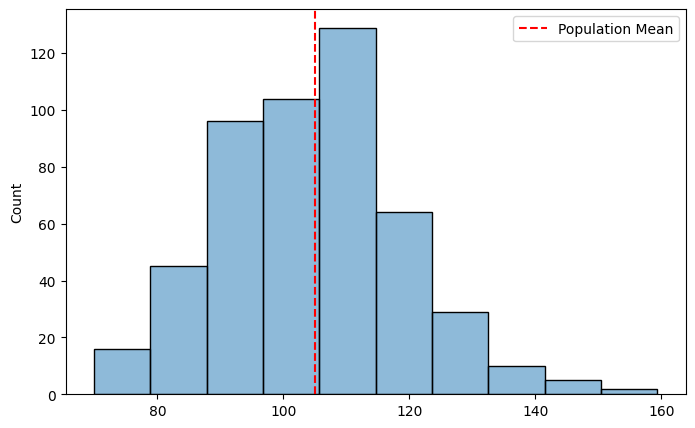

In [59]:
# Plotting sample means - exponential
n = 500
expo_samples = [np.mean(np.random.exponential(POPULATION_MU, sample_size)) for i in range(n)]

vals = np.zeros((n, 1))
for i in range(n):
    sample_mean = np.mean(expo_samples[i])
    vals[i] = sample_mean

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(vals, bins=10, ax=ax)
ax.axvline(POPULATION_MU, linestyle='--', color='r', label='Population Mean')
ax.legend()
plt.show()

In [60]:
outputs = stats.jarque_bera(expo_samples)
if outputs[-1] > 0.05:
    print(f'Pvalue: {outputs[-1]}')
    print('The distribution of sample means is likely normal')
else:
    print(f'Pvalue: {outputs[-1]}')
    print('The distribution of sample means is unlikely to be normal')

Pvalue: 0.002992990415806383
The distribution of sample means is unlikely to be normal


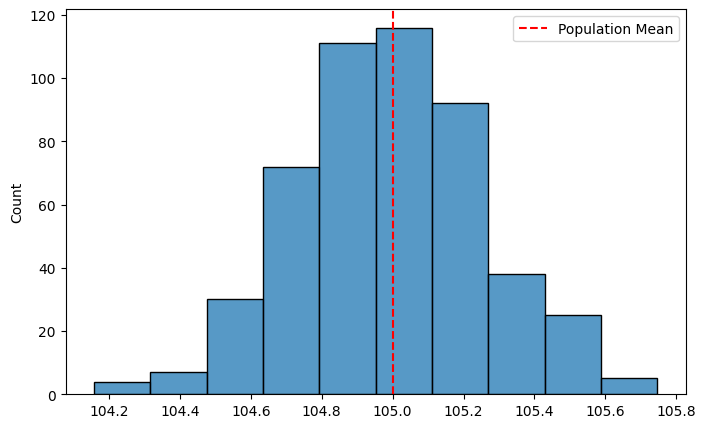

Pvalue: 0.9484904142189191
The distribution of sample means is likely normal


In [63]:
# Plotting Samples Means - Autocorrelated

n = 500
autocorrelated_samples = [(generated_autocorrelated_data(0.5, 0, 1, sample_size) + POPULATION_MU) for i in range(n)]
autocorrelated_means = [np.mean(autocorrelated_samples[i]) for i in range(n)]

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(autocorrelated_means, bins=10, ax=ax)
ax.axvline(POPULATION_MU, linestyle='--', color='r', label='Population Mean')
ax.legend()
plt.show()

outputs = stats.jarque_bera(autocorrelated_means)
if outputs[-1] > 0.05:
    print(f'Pvalue: {outputs[-1]}')
    print('The distribution of sample means is likely normal')
else:
    print(f'Pvalue: {outputs[-1]}')
    print('The distribution of sample means is unlikely to be normal')

In [65]:
## Exercise 4: Small Sample Sizes

n = 100
small_size = 3
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=small_size) for i in range(n)]

for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1
print(f'Empirical Convergence: {correct / n}')
print(f'Threshold: 0.95')

Empirical Convergence: 0.83
Threshold: 0.95


In [66]:
n = 100
small_size = 5
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=small_size) for i in range(n)]

for i in range(n):
    t_val = stats.t.ppf((1 + 0.95)/2, 4)
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    h = sample_SE * t_val
    if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
        correct += 1

print(f'Empirical Convergence: {correct / n}')
print('Threshold: 0.95')

Empirical Convergence: 0.93
Threshold: 0.95


In [71]:
# Exercise 5: Dependence
n = 100
correct = 0
theta = 0.5
noise_mu = 0
noise_sigma = 1

for i in range(n):
    X = generated_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = np.std(X) / np.sqrt(sample_size)
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1

print(f'Empirical Convergence: {correct}')
print(f'Threshold: {int(0.95 * n)}')

Empirical Convergence: 75
Threshold: 95


In [83]:
from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats.sandwich_covariance as sw
from statsmodels import regression
import statsmodels.api as sm

def generate_autocorrelated_data(theta, mu, sigma, N):
    X = np.zeros((N, 1))
    for t in range(1, N):
        X[t] = theta * X[t-1] + np.random.normal(mu, sigma)
    return X

def newey_west_SE(data):
    ind = range(0, len(data))
    ind = sm.add_constant(ind)
    model = regression.linear_model.OLS(data, ind).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    return model.bse[0]

def newey_west_matrix(data):
    ind = range(0, len(data))
    ind = sm.add_constant(ind)
    model = regression.linear_model.OLS(data, ind).fit()
    return sw.cov_hac(model)

In [80]:
# T-distribution Correction

# n = 100
# corret = 0

# for i in range(n):
#     X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
#     # sample_mean = np.mean(X)
#     # sample_SE = np.std(X) / np.sqrt(sample_size)
#     # t_val = sample_SE * stats.t.ppf((1 + 0.95) / 2, X.shape[0] - 1)
#     # lower = sample_mean - t_val
#     # upper = sample_mean + t_val

#     # if (POPULATION_MU >= lower) and (POPULATION_MU <= upper):
#     #     correct += 1

#     sample_mean = np.mean(X)
#     sample_SE = np.std(X) / np.sqrt(sample_size)
#     h = sample_SE * stats.t.ppf((1+0.95) / 2, len(X)-1)
#     if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
#         correct += 1

n = 100
correct = 0

#Your code goes here

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = np.std(X) / np.sqrt(sample_size)
    h = sample_SE * stats.t.ppf((1+0.95) / 2, len(X)-1)
    if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
        correct += 1

print(f'Empirical Convergence: {correct}')
print(f'Threshold: {int(0.95 * n)}')

Empirical Convergence: 71
Threshold: 95


In [84]:
# Newey-West Matrix
X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
matrix = newey_west_matrix(X)

In [92]:
print(matrix)

[[ 3.19303985e-01 -9.16623797e-03]
 [-9.16623797e-03  2.84528841e-04]]


In [94]:
n = 100
correct = 0

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = newey_west_SE(X)
    h = sample_SE * stats.t.ppf((1+0.95) / 2, len(X)-1)
    if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
        correct += 1

print(f'Empirical Convergence: {correct}')
print(f'Threshold: {int(0.95 * n)}')

Empirical Convergence: 98
Threshold: 95
